In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import re


In [309]:
data = pd.read_csv('Train.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [255]:
data.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

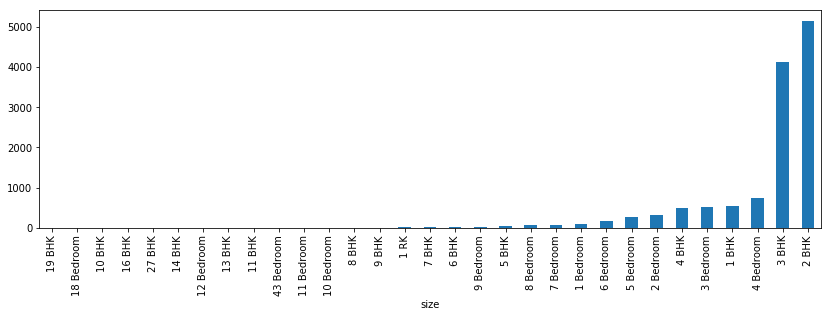

In [256]:
data.groupby(['size'])['balcony'].count().\
sort_values().\
plot(kind='bar',figsize=(14,4))

In [257]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [258]:
data[data['location'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [259]:
data[data['society']=='Grare S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [310]:
data['location'].fillna('Anantapura',inplace=True)

In [261]:
data[data['society']=='Grare S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13320 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [263]:
data[data['size'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [264]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [311]:
import re

data['size'] = data[data['size'].isna()==False]['size'].str.extract('(\d)')

In [266]:
# data[data['size'].isna()==False]['size'].astype('int',inplace=True)

In [312]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [313]:
def sqft(sq):
    j=sq.split('-')
    if len(j)==1:
        j.insert(0,'0')
    j[1] = re.findall('\d+',j[1])
    return j
data['total_sqft']=data['total_sqft'].apply(sqft)

In [314]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,"[0, [1056]]",2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,"[0, [2600]]",5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,"[0, [1440]]",2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,"[0, [1521]]",3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,"[0, [1200]]",2.0,1.0,51.00


In [315]:
data['min_sqft'] = data['total_sqft'].apply(lambda x : float(x[0]))
data['max_sqft'] = data['total_sqft'].apply(lambda x : float(x[1][0]))
# data['max_sqft'] = data['total_sqft'].apply(lambda x : float(re.findall('\d+',x[1])[0]))

In [316]:
data.drop('total_sqft',axis=1,inplace=True)

In [317]:
data.head()

,area_type,availability,location,size,society,bath,balcony,price,min_sqft,max_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,2.0,1.0,39.07,0.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,5.0,3.0,120.00,0.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,2.0,3.0,62.00,0.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,3.0,1.0,95.00,0.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,2.0,1.0,51.00,0.0,1200.0


In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13320 non-null object
size            13304 non-null object
society         7818 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
min_sqft        13320 non-null float64
max_sqft        13320 non-null float64
dtypes: float64(5), object(5)
memory usage: 1.0+ MB


In [318]:
a=(data['min_sqft']+data['max_sqft'])/2
a

0         528.0
1        1300.0
2         720.0
3         760.5
4         600.0
5         585.0
6        1366.0
7        1650.0
8         655.0
9         510.0
10        900.0
11       1392.5
12        500.0
13        550.0
14       1125.0
15        587.5
16        590.0
17        770.0
18       1385.0
19        550.0
20        300.0
21        877.5
22       1400.0
23        883.5
24        255.0
25        625.0
26        330.0
27        805.0
28        575.5
29        512.5
          ...  
13290    2025.0
13291     406.0
13292     720.0
13293    1212.5
13294    1100.0
13295     905.0
13296     600.0
13297     530.0
13298     507.5
13299    2856.0
13300     750.0
13301     727.0
13302     537.5
13303     387.0
13304     593.5
13305     250.0
13306     600.0
13307     902.5
13308     763.5
13309     837.5
13310     525.0
13311     750.0
13312     631.0
13313     672.5
13314     857.5
13315    1726.5
13316    1800.0
13317     570.5
13318    2344.5
13319     275.0
Length: 13320, dtype: fl

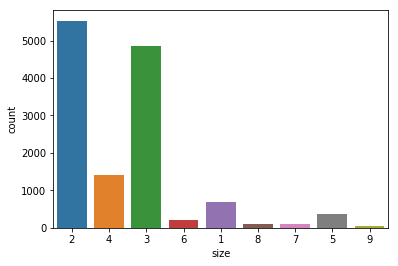

In [275]:

sns.countplot('size',data=data)

In [1]:
sns.distplot(np.log(a))

NameError: name 'sns' is not defined

In [320]:
data['mean_sqft'] = np.log(a)

In [279]:
data['size'].value_counts()

2    5529
3    4857
4    1418
1     680
5     356
6     221
7     100
8      89
9      54
Name: size, dtype: int64

In [321]:
def fill_size(data):
    size = data[0]
    sqft = data[1]
    
    if pd.isnull(size):
        if sqft<640:
            return '2'
        elif sqft>640 and sqft<845:
            return '3'
        else:
            return '4'
    else:
        return size
    
data['size'] = data[['size','mean_sqft']].apply(fill_size, axis=1)

In [322]:
data['size'].value_counts()

2    5545
3    4857
4    1418
1     680
5     356
6     221
7     100
8      89
9      54
Name: size, dtype: int64

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13320 non-null object
size            13320 non-null object
society         7818 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
min_sqft        13320 non-null float64
max_sqft        13320 non-null float64
mean_sqft       13320 non-null float64
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


In [324]:
data.head()

,area_type,availability,location,size,society,bath,balcony,price,min_sqft,max_sqft,mean_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,2.0,1.0,39.07,0.0,1056.0,6.269096
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,5.0,3.0,120.00,0.0,2600.0,7.170120
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,2.0,3.0,62.00,0.0,1440.0,6.579251
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,3.0,1.0,95.00,0.0,1521.0,6.633976
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,2.0,1.0,51.00,0.0,1200.0,6.396930


In [283]:
data['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

In [325]:
def fill_bath(data):
    bath = data[0]
    sqft = data[1]
    
    if pd.isnull(bath):
        if sqft<640:
            return 2.0
        elif sqft>640 and sqft<845:
            return 3.0
        else:
            return 4.0
    else:
        return bath
    
data['bath'] = data[['bath','mean_sqft']].apply(fill_bath, axis=1)

In [285]:
data['bath'].value_counts()

2.0     6981
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13320 non-null object
size            13320 non-null object
society         7818 non-null object
bath            13320 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
min_sqft        13320 non-null float64
max_sqft        13320 non-null float64
mean_sqft       13320 non-null float64
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


In [287]:
data['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

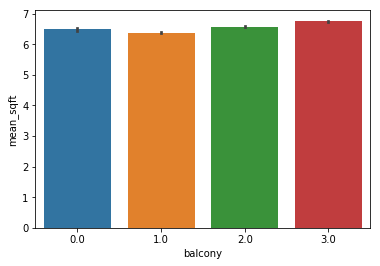

In [288]:
sns.barplot(x='balcony',y='mean_sqft',data=data)

In [291]:
data['mean_sqft'].describe()

count    13320.000000
mean         6.537136
std          0.512809
min         -0.693147
25%          6.309918
50%          6.461468
75%          6.739928
max         10.171069
Name: mean_sqft, dtype: float64

In [222]:
# a=b=0
# for i,j in zip(data['balcony'],data['mean_sqft']):
#     if i==2.0:
#         if j<792:
#             a+=1
#     elif i==1.0:
#         if j<792:
#             b+=1
# a,b

In [326]:
def fill_balcony(data):
    bal=data[0]
    sqft=data[1]
    if pd.isnull(bal):
        if sqft<792:
            return 1.0
        else:
            return 2.0
    else:
        return bal
data['balcony']=data[['balcony','mean_sqft']].apply(fill_balcony, axis=1)

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13320 non-null object
size            13320 non-null object
society         7818 non-null object
bath            13320 non-null float64
balcony         13320 non-null float64
price           13320 non-null float64
min_sqft        13320 non-null float64
max_sqft        13320 non-null float64
mean_sqft       13320 non-null float64
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


In [328]:
data.head()

,area_type,availability,location,size,society,bath,balcony,price,min_sqft,max_sqft,mean_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,2.0,1.0,39.07,0.0,1056.0,6.269096
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,5.0,3.0,120.00,0.0,2600.0,7.170120
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,2.0,3.0,62.00,0.0,1440.0,6.579251
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,3.0,1.0,95.00,0.0,1521.0,6.633976
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,2.0,1.0,51.00,0.0,1200.0,6.396930


In [329]:
data.nunique()

area_type          4
availability      81
location        1305
size               9
society         2688
bath              19
balcony            4
price           1994
min_sqft         158
max_sqft        1894
mean_sqft       1960
dtype: int64

In [330]:
data['availability']=data['availability'].apply(lambda x: "".join(re.findall("[a-zA-Z]+", x)))

In [297]:
# data.groupby('area_type')['price'].mean()

area_type
Built-up  Area          104.285498
Carpet  Area             89.502356
Plot  Area              208.495486
Super built-up  Area     92.971757
Name: price, dtype: float64

In [298]:
# data['area_type'].replace(['Super built-up  Area', 'Plot  Area', 'Built-up  Area','Carpet  Area'],[92.971757,208.495486,104.285498,89.502356],inplace=True)

In [299]:
# data.groupby('balcony')['price'].mean()

balcony
0.0    110.698469
1.0    103.718812
2.0    109.981948
3.0    150.748768
Name: price, dtype: float64

In [300]:
# data['balcony'].replace([1.0,2.0,3.0,0.0],[87.237949,124.716895,150.748768,110.698469],inplace=True)

In [331]:
data.head()

,area_type,availability,location,size,society,bath,balcony,price,min_sqft,max_sqft,mean_sqft
0,Super built-up Area,Dec,Electronic City Phase II,2,Coomee,2.0,1.0,39.07,0.0,1056.0,6.269096
1,Plot Area,ReadyToMove,Chikka Tirupathi,4,Theanmp,5.0,3.0,120.00,0.0,2600.0,7.170120
2,Built-up Area,ReadyToMove,Uttarahalli,3,NaN,2.0,3.0,62.00,0.0,1440.0,6.579251
3,Super built-up Area,ReadyToMove,Lingadheeranahalli,3,Soiewre,3.0,1.0,95.00,0.0,1521.0,6.633976
4,Super built-up Area,ReadyToMove,Kothanur,2,NaN,2.0,1.0,51.00,0.0,1200.0,6.396930


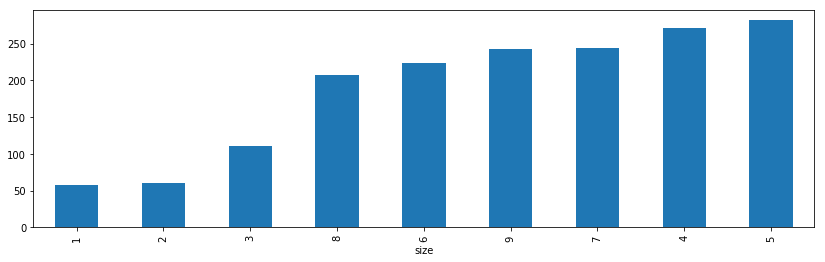

In [302]:
data.groupby(['size'])['price'].mean().\
sort_values().\
plot(kind='bar',figsize=(14,4))

In [378]:
data['balcony'] = data['balcony'].apply(lambda x: str(x))
data['bath'] = data['bath'].apply(lambda x: str(x))

In [379]:
X = data.drop(['society','price'],axis=1)
y= data['price']

In [380]:
X.head()

,area_type,availability,location,size,bath,balcony,min_sqft,max_sqft,mean_sqft
0,Super built-up Area,Dec,Electronic City Phase II,2,2.0,1.0,0.0,1056.0,6.269096
1,Plot Area,ReadyToMove,Chikka Tirupathi,4,5.0,3.0,0.0,2600.0,7.170120
2,Built-up Area,ReadyToMove,Uttarahalli,3,2.0,3.0,0.0,1440.0,6.579251
3,Super built-up Area,ReadyToMove,Lingadheeranahalli,3,3.0,1.0,0.0,1521.0,6.633976
4,Super built-up Area,ReadyToMove,Kothanur,2,2.0,1.0,0.0,1200.0,6.396930


In [381]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13320 non-null object
size            13320 non-null object
bath            13320 non-null object
balcony         13320 non-null object
min_sqft        13320 non-null float64
max_sqft        13320 non-null float64
mean_sqft       13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [382]:
type(X['size'][0])

str

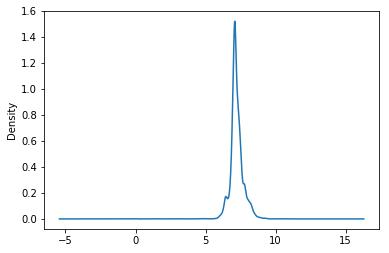

In [383]:
np.log(X['max_sqft']).plot(kind='kde')

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [385]:
X_test.head()

,area_type,availability,location,size,bath,balcony,min_sqft,max_sqft,mean_sqft
8077,Built-up Area,ReadyToMove,Banjara Layout,2,2.0,1.0,0.0,1050.0,6.263398
1602,Super built-up Area,ReadyToMove,Rajiv Nagar,3,3.0,1.0,0.0,1690.0,6.739337
10498,Built-up Area,ReadyToMove,Hebbal,2,2.0,1.0,0.0,1100.0,6.309918
3297,Plot Area,ReadyToMove,Munnekollal,6,4.0,2.0,0.0,1200.0,6.396930
8893,Built-up Area,Apr,Choodasandra,4,3.0,1.0,0.0,2429.0,7.102088


In [386]:
# X_train_cat = X_train[['availability','location','size','bath']]
# X_train_numeric = X_train[['area_type','min_sqft','max_sqft','mean_sqft','balcony']]
# X_test_cat = X_test[['availability','location','size','bath']]
# X_test_numeric = X_test[['area_type','min_sqft','max_sqft','mean_sqft','balcony']]

X_train_cat = X_train.select_dtypes(exclude=[np.number])
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_cat = X_test.select_dtypes(exclude=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

In [387]:
X_train_cat.head()

,area_type,availability,location,size,bath,balcony
3411,Super built-up Area,ReadyToMove,Lingadheeranahalli,3,2.0,2.0
9142,Super built-up Area,ReadyToMove,Cooke Town,2,2.0,2.0
1971,Super built-up Area,ReadyToMove,Raja Rajeshwari Nagar,3,3.0,2.0
2608,Plot Area,ReadyToMove,Banashankari,4,3.0,2.0
9635,Built-up Area,Dec,Kanakapura,2,2.0,1.0


In [388]:
X_train_numeric.head()

,min_sqft,max_sqft,mean_sqft
3411,0.0,1530.0,6.639876
9142,0.0,1310.0,6.484635
1971,0.0,1530.0,6.639876
2608,0.0,2400.0,7.090077
9635,0.0,1017.0,6.231465


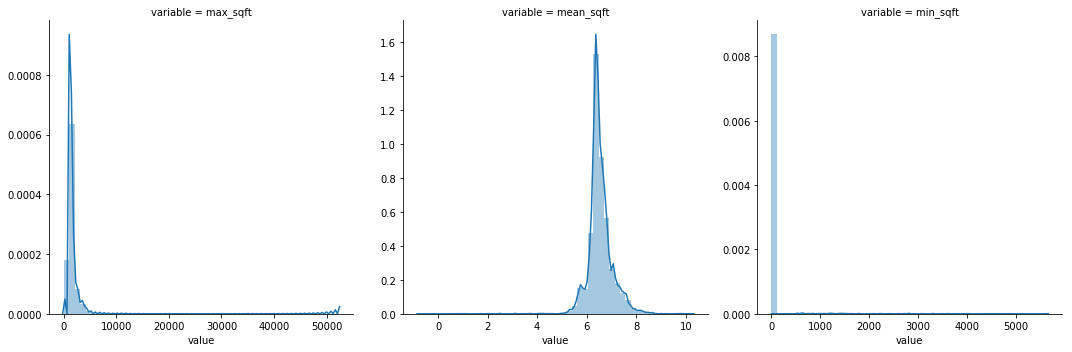

In [389]:
f = pd.melt(X_train_numeric, value_vars=sorted(X_train_numeric))
g = sns.FacetGrid(f, col='variable',col_wrap=3,sharex=False, sharey=False,height=5)
g = g.map(sns.distplot,'value')

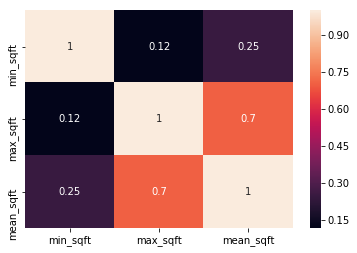

In [390]:
sns.heatmap(X_train_numeric.corr(),annot=True)

C:\Users\Maulin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


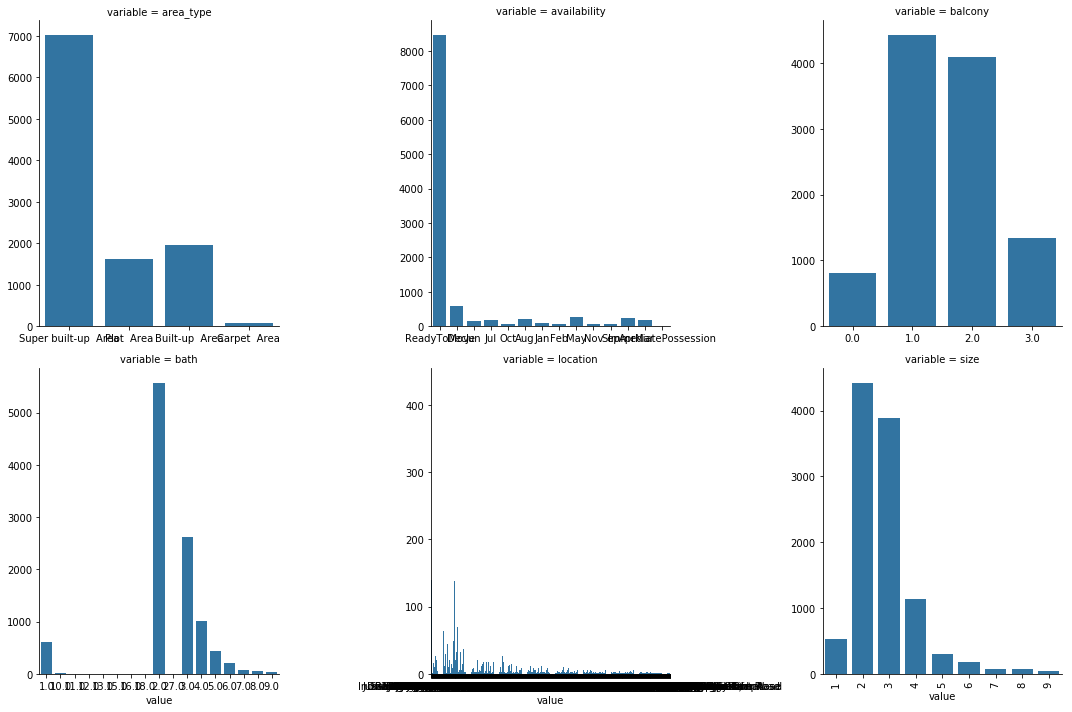

In [399]:
f = pd.melt(X_train_cat, value_vars=sorted(X_train_cat))
g = sns.FacetGrid(f, col='variable',col_wrap=3,sharex=False, sharey=False,height=5)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot,'value')

C:\Users\Maulin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


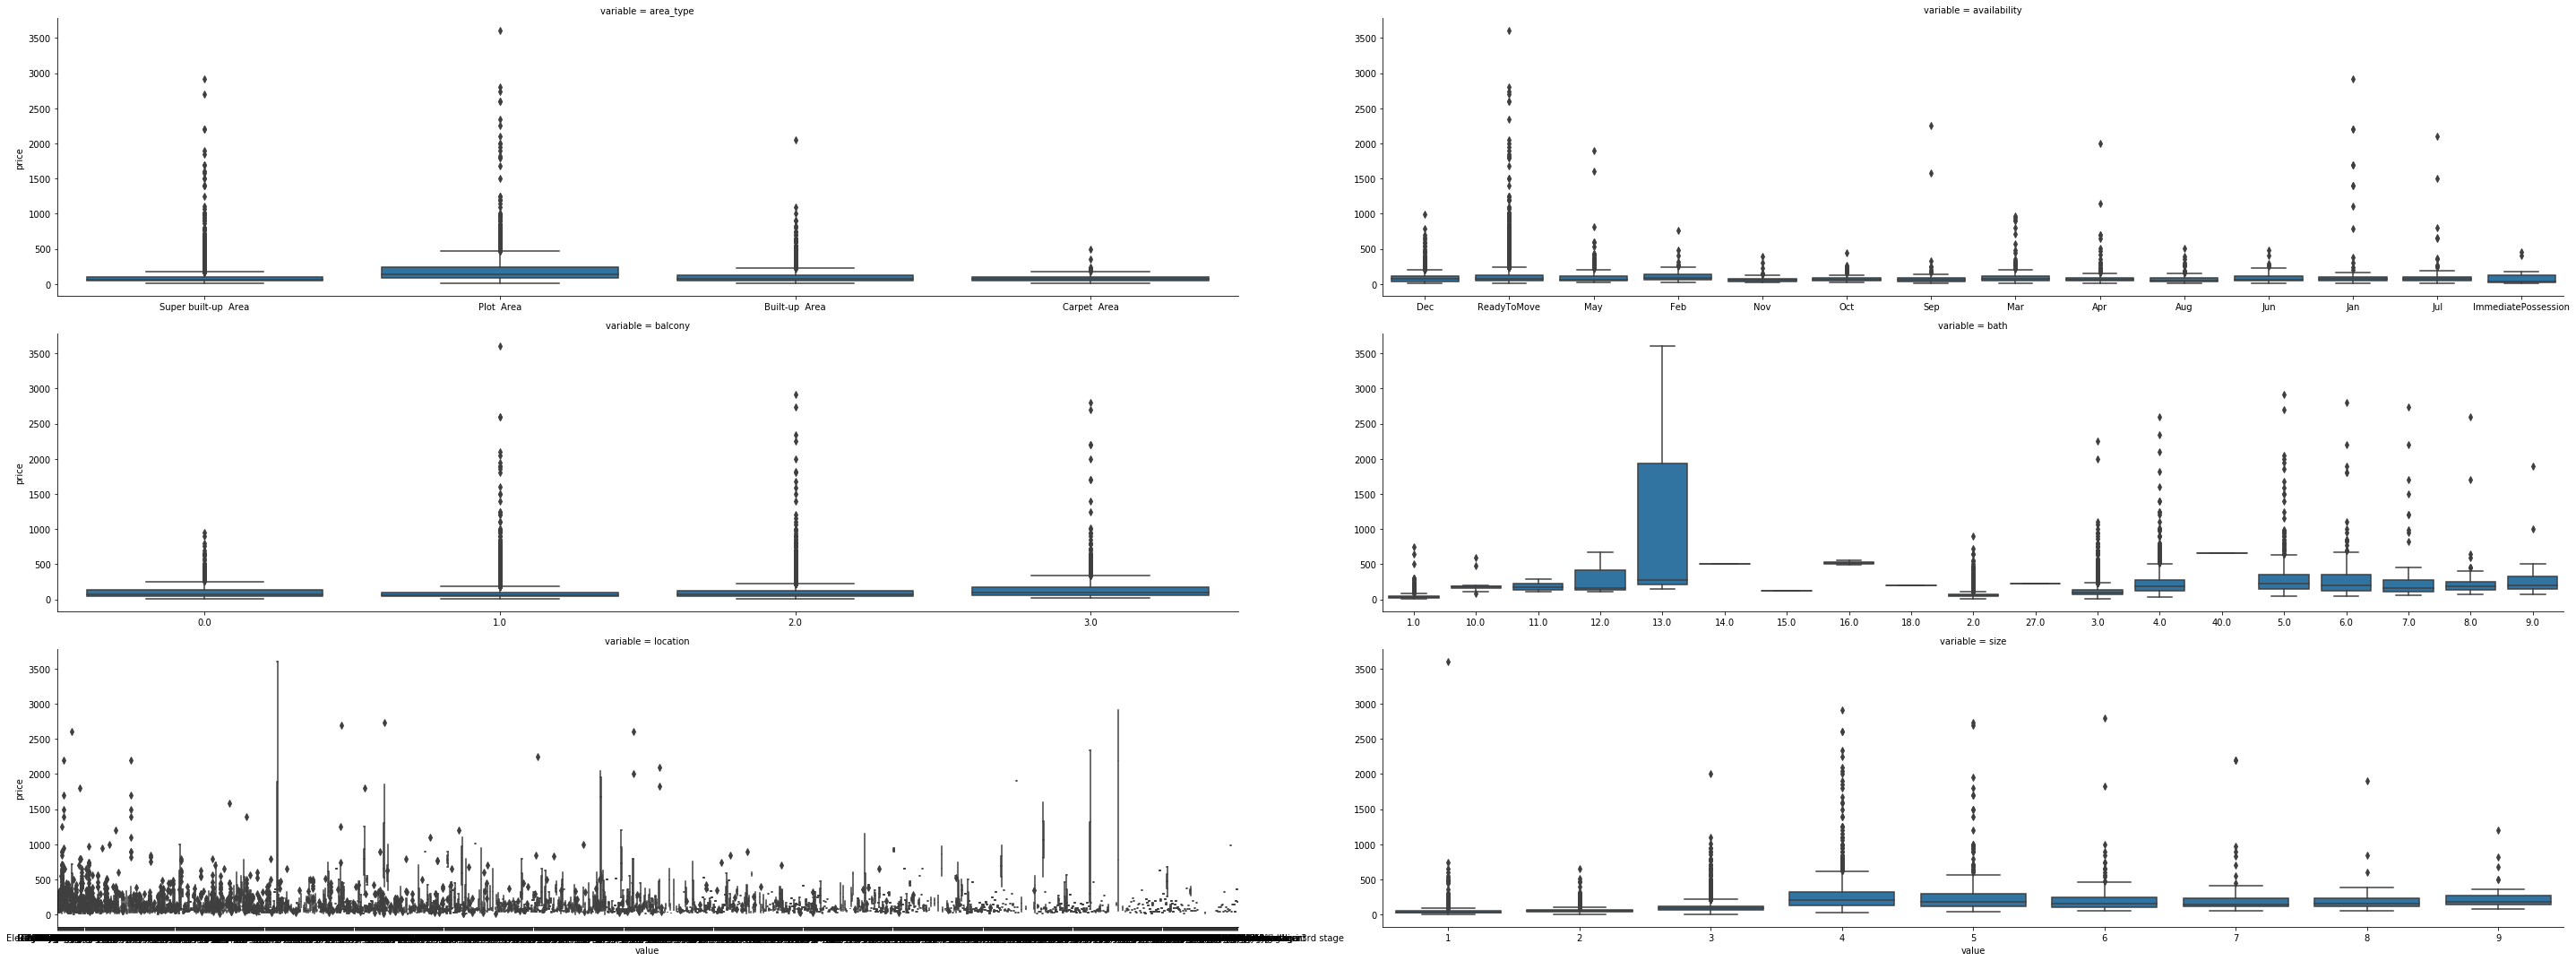

In [403]:
f = pd.melt(data,id_vars=['price'], value_vars=sorted(X_train_cat))
g = sns.FacetGrid(f, col='variable',col_wrap=2,sharex=False, sharey=False,height=5,aspect=4)
g = g.map(sns.boxplot,'value','price')

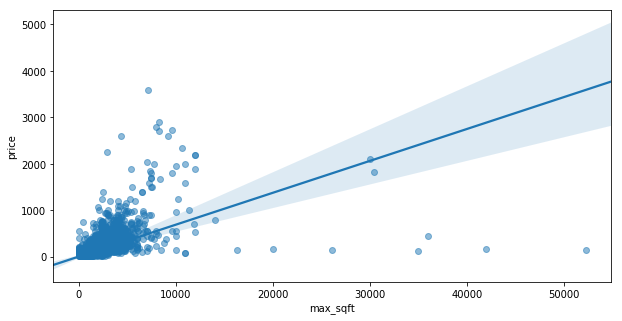

In [420]:
plt.figure(figsize=(10,5))
sns.regplot(data['max_sqft'],data['price'],scatter_kws={'alpha':0.5})

In [391]:
oh = OneHotEncoder(handle_unknown='ignore')
X_train_oh = oh.fit_transform(X_train_cat).toarray()
X_test_oh = oh.transform(X_test_cat).toarray()

In [392]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_numeric)
X_test_sc = sc.transform(X_test_numeric)

In [393]:
X_train_final = np.hstack((X_train_oh,X_train_sc))
X_test_final = np.hstack((X_test_oh,X_test_sc))

In [394]:
linmodel = LinearRegression()
linmodel.fit(X_train_final,y_train)
print('training score:',linmodel.score(X_train_final,y_train))
print('test score:',linmodel.score(X_test_final,y_test))

training score: 0.6731221696314889
test score: -2.343856911230508e+19


In [395]:
ridgemodel = Ridge(alpha=1)
ridgemodel.fit(X_train_final,y_train)
print('training score:',ridgemodel.score(X_train_final,y_train))
print('test score:',ridgemodel.score(X_test_final,y_test))

training score: 0.6563848183658281
test score: 0.6005758828739363


In [355]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_X_train = poly.fit_transform(X_train_final)
poly_X_test = poly.transform(X_test_final)

MemoryError: 

In [396]:
knnmodel = KNeighborsRegressor(n_neighbors=20)
knnmodel.fit(X_train_final,y_train)
print('training score:',knnmodel.score(X_train_final,y_train))
print('test score:',knnmodel.score(X_test_final,y_test))

training score: 0.6004371051233615
test score: 0.6475337533437986


In [397]:
rfmodel = RandomForestRegressor(n_estimators=1200,max_depth=6,max_samples=0.8)
rfmodel.fit(X_train_final,y_train)
print('training score:',rfmodel.score(X_train_final,y_train))
print('test score:',rfmodel.score(X_test_final,y_test))

training score: 0.743296336640092
test score: 0.6177970641308896


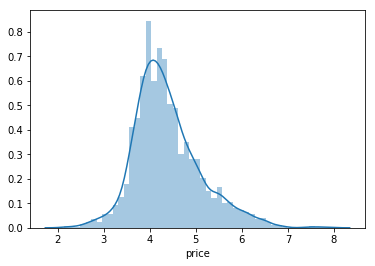

In [161]:
sns.distplot(np.log(y_test))